In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def show_gray_img(img):
    plt.subplots(figsize=(7,7))
    plt.imshow(X=img, cmap='gray') 
    plt.show()

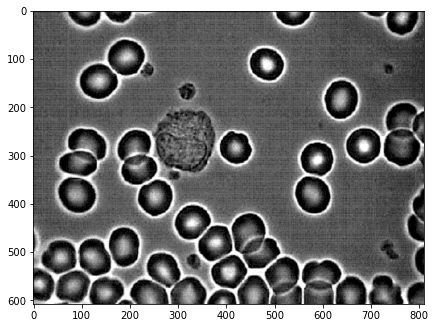

In [3]:
gray = cv2.imread(filename='blood.png',flags=cv2.IMREAD_GRAYSCALE)
show_gray_img(gray)

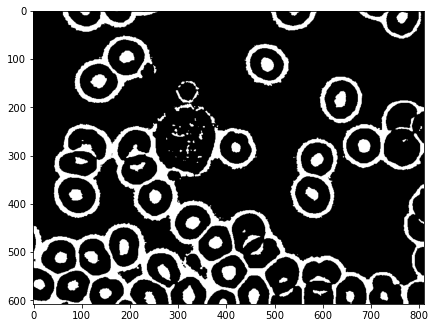

In [4]:
blur = cv2.GaussianBlur(gray,(5,5),0)
ret, threshold = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show_gray_img(threshold)

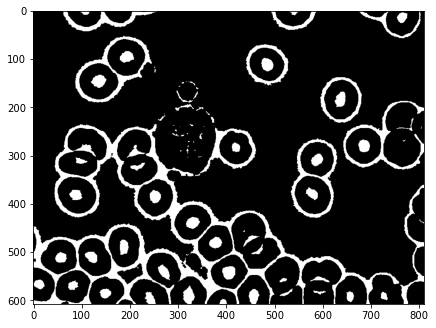

In [5]:
erode = cv2.erode(threshold,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 1)
show_gray_img(erode)

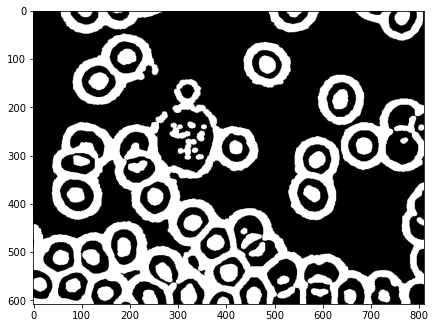

In [6]:
dilate = cv2.dilate(erode,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)),iterations = 1)
show_gray_img(dilate)

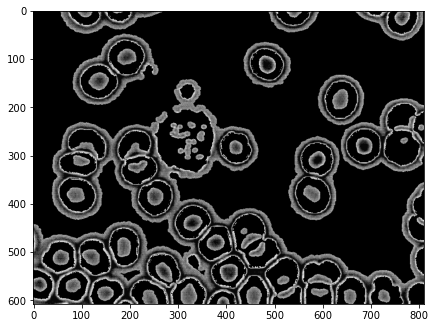

In [7]:
res = gray * dilate
show_gray_img(res)

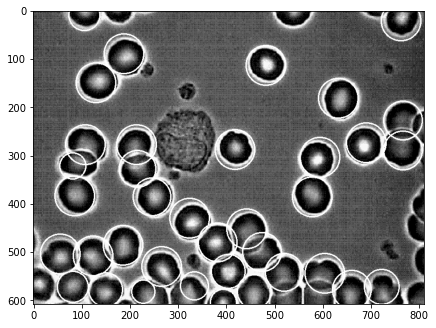

Количество клеток крови:  37


In [8]:
circles = cv2.HoughCircles(image=res,method=cv2.HOUGH_GRADIENT,dp=1,minDist=50,param1=150,param2=25,minRadius=21,maxRadius=42)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(gray,(i[0],i[1]),i[2],(255,0,0),2)
show_gray_img(gray)
print('Количество клеток крови: ', circles[0].shape[0])